In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.constants as const
from matplotlib import font_manager

In [7]:
font_path = "C:/Windows/Fonts/Arial.ttf"
font_prop = font_manager.FontProperties(fname=font_path)
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['axes.unicode_minus'] = False  # 유니코드 마이너스 기호 문제 해결


In [8]:
# Read raw data
conditions = []
with open('qt_conditions_list.txt','r') as file:
    for line in file:        
        line = line.strip()
        line = line[2:]
        conditions.append(line)
    file.close()

species = []
with open('qt_species_list.txt','r') as file:
    i = 0
    for line in file:        
        line = line.strip()
        if i < 9:
            line = line[2:]
        else:
            line = line[3:]
        species.append(line)
        i += 1
    file.close()

reactions = []
with open('qt_reactions_list.txt','r') as file:
    for line in file:        
        line = line.strip()
        line = line[2:]
        reactions.append(line)
    file.close()

df_cd = pd.read_csv('qt_conditions.txt', sep=r'\s+', header=0, names=['Time [s]']+conditions)
df_sp = pd.read_csv('qt_densities.txt', sep=r'\s+', header=0, names=['Time [s]']+species)
df_rx = pd.read_csv('qt_rates.txt', sep=r'\s+', header=0, names=['Time [s]']+reactions)

In [9]:
sorted(species)

['C2H',
 'C2H2',
 'C2H2(V13)',
 'C2H2(V2)',
 'C2H2(V5)',
 'C2H2^+',
 'C2H3',
 'C2H3^+',
 'C2H4',
 'C2H4(V1)',
 'C2H4(V2)',
 'C2H4^+',
 'C2H5',
 'C2H5^+',
 'C2H6',
 'C2H6(V13)',
 'C2H6(V24)',
 'C2H6^+',
 'C3H4',
 'C3H4^+',
 'C3H5',
 'C3H5^+',
 'C3H6',
 'C3H6(V)',
 'C3H6^+',
 'C3H7',
 'C3H7^+',
 'C3H8',
 'C3H8(V1)',
 'C3H8(V2)',
 'C3H8^+',
 'C4H9',
 'C5H12',
 'CH',
 'CH2',
 'CH2^+',
 'CH3',
 'CH3^+',
 'CH4',
 'CH4(V13)',
 'CH4(V24)',
 'CH4^+',
 'CH5^+',
 'CH^+',
 'E',
 'H',
 'H2',
 'H2^+',
 'H3^+',
 'H^+']

In [10]:
df_CH4 = df_sp['CH4']
df_C2H6 = df_sp['C2H6']
df_C2H4 = df_sp['C2H4']
df_C2H2 = df_sp['C2H2']
df_C3H8 = df_sp['C3H8']
df_C3H6 = df_sp['C3H6']
df_C4H9 = df_sp['C4H9']
df_C5H12 = df_sp['C5H12']

In [11]:
M_CH4 = df_CH4 / const.N_A * 16
M_C2H6 = df_C2H6 / const.N_A * 30
M_C2H4 = df_C2H4 / const.N_A * 28
M_C2H2 = df_C2H2 / const.N_A * 26
M_C3H8 = df_C3H8 / const.N_A * 44
M_C3H6 = df_C3H6 / const.N_A * 42
M_C4H9 = df_C4H9 / const.N_A * 57
M_C5H12 = df_C5H12 / const.N_A * 72

In [12]:
Conv_CH4 = (M_CH4.iloc[0] - M_CH4) / M_CH4.iloc[0] * 100
Sel_C2H6 = M_C2H6 / (M_CH4.iloc[0] - M_CH4) * 100
Sel_C2H4 = M_C2H4 / (M_CH4.iloc[0] - M_CH4) * 100
Sel_C2H2 = M_C2H2 / (M_CH4.iloc[0] - M_CH4) * 100
Sel_C3H8 = M_C3H8 / (M_CH4.iloc[0] - M_CH4) * 100
Sel_C3H6 = M_C3H6 / (M_CH4.iloc[0] - M_CH4) * 100
Sel_C4H9 = M_C4H9 / (M_CH4.iloc[0] - M_CH4) * 100
Sel_C5H12 = M_C5H12 / (M_CH4.iloc[0] - M_CH4) * 100

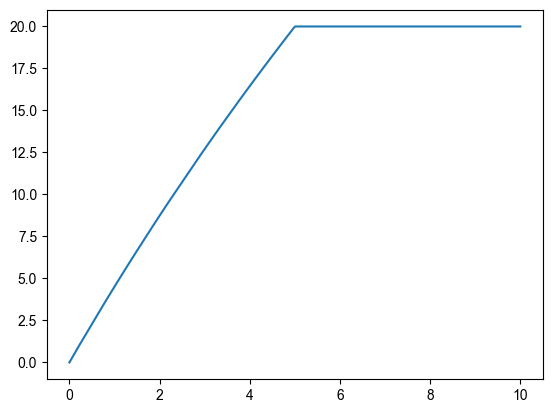

In [13]:
plt.plot(df_sp['Time [s]'], Conv_CH4)

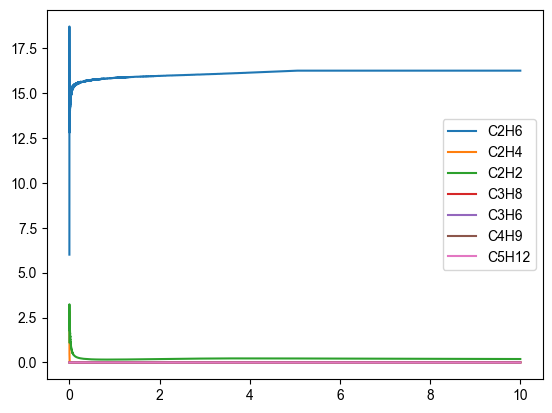

In [14]:
plt.plot(df_sp['Time [s]'], Sel_C2H6, label='C2H6')
plt.plot(df_sp['Time [s]'], Sel_C2H4, label='C2H4')
plt.plot(df_sp['Time [s]'], Sel_C2H2, label='C2H2')
plt.plot(df_sp['Time [s]'], Sel_C3H8, label='C3H8')
plt.plot(df_sp['Time [s]'], Sel_C3H6, label='C3H6')
plt.plot(df_sp['Time [s]'], Sel_C4H9, label='C4H9')
plt.plot(df_sp['Time [s]'], Sel_C5H12, label='C5H12')
plt.legend()

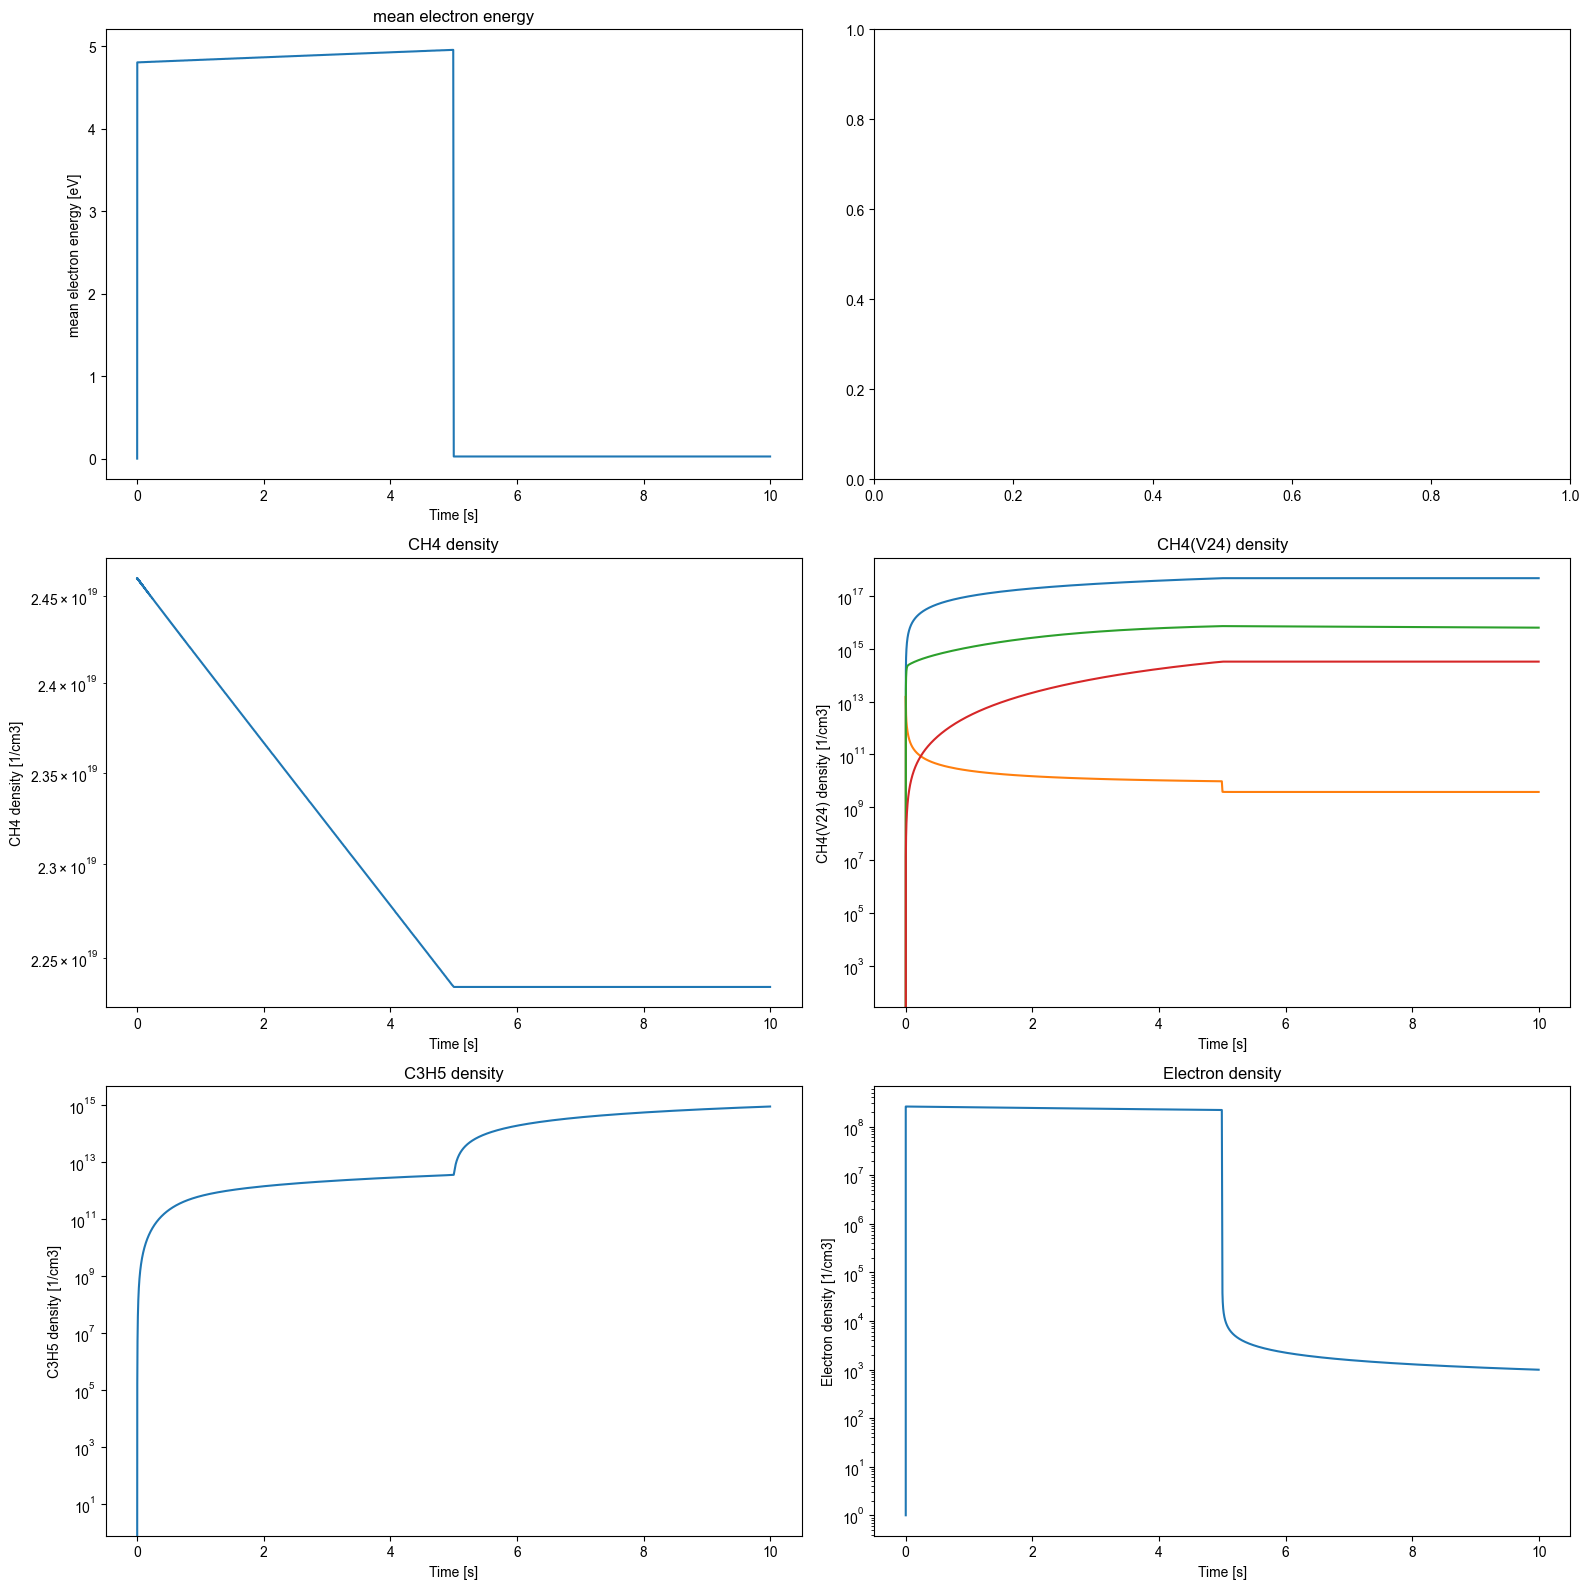

In [15]:
fig, axs = plt.subplots(3,2,figsize=(16,16))

axs[0,0].plot(df_cd['Time [s]'],df_cd['Electron temperature [K]'] / const.e * const.k)
axs[0,0].set_xlabel('Time [s]')
axs[0,0].set_ylabel('mean electron energy [eV]')
axs[0,0].set_title('mean electron energy')


axs[1,0].plot(df_sp['Time [s]'],df_sp['CH4']+df_sp['CH4(V13)']+df_sp['CH4(V24)'])
axs[1,0].set_yscale('log')
axs[1,0].set_xlabel('Time [s]')
axs[1,0].set_ylabel('CH4 density [1/cm3]')
axs[1,0].set_title('CH4 density')

axs[1,1].plot(df_sp['Time [s]'],df_sp['C2H6'] + df_sp['C2H6(V13)'] + df_sp['C2H6(V24)'] )
axs[1,1].plot(df_sp['Time [s]'],df_sp['C2H4'] + df_sp['C2H4(V1)'] + df_sp['C2H4(V2)'])
axs[1,1].plot(df_sp['Time [s]'],df_sp['C2H2'] + df_sp['C2H2(V5)'] + df_sp['C2H2(V2)'] + df_sp['C2H2(V13)'])
axs[1,1].plot(df_sp['Time [s]'],df_sp['C3H8'] + df_sp['C3H8(V1)'] + df_sp['C3H8(V2)'])
axs[1,1].set_yscale('log')
axs[1,1].set_xlabel('Time [s]')
axs[1,1].set_ylabel('CH4(V24) density [1/cm3]')
axs[1,1].set_title('CH4(V24) density')

axs[2,0].plot(df_sp['Time [s]'],df_sp[species[2]])
axs[2,0].set_yscale('log')
axs[2,0].set_xlabel('Time [s]')
axs[2,0].set_ylabel(species[2]+' density [1/cm3]')
axs[2,0].set_title(species[2]+' density')

axs[2,1].plot(df_sp['Time [s]'],df_sp['E'])
axs[2,1].set_yscale('log')
axs[2,1].set_xlabel('Time [s]')
axs[2,1].set_ylabel('Electron density [1/cm3]')
axs[2,1].set_title('Electron density')

plt.tight_layout()
plt.show()

In [16]:
for i in range(len(species)):
    print(f'{species[i]}: {df_sp[species[i]].iloc[-1]}')

E: 990.78
H2: 1.141e+18
C3H5: 897590000000000.0
C2H4(V2): 860270000.0
CH4: 1.9689e+19
C2H3^+: 2.8069e-10
H^+: 0.0
C3H5^+: 4.6701e-10
C3H6: 2620500000000.0
CH2: 2.3015
C5H12: 0.0
C3H8: 300880000000000.0
H: 14996000.0
C2H2^+: 3.5382e-24
C2H6^+: 0.0
C2H4(V1): 2964500000.0
C3H4: 2696900000000.0
C2H: 4.3997e-11
C2H2: 5833600000000000.0
C2H6: 4.2556e+17
C2H2(V5): 244370000000000.0
C3H8^+: 1.6577e-09
C3H7: 36662.0
CH3: 1.3146e+18
CH4^+: 0.0
H3^+: 0.0
CH2^+: 0.0
CH^+: 0.0
C2H2(V13): 53878000000000.0
C3H7^+: 8.5656e-10
C2H2(V2): 87561000000000.0
C2H4^+: 6.3393
C2H6(V24): 1.8381e+16
C2H6(V13): 1.7333e+16
C2H4: 976.05
CH4(V13): 1.2959e+18
C3H8(V1): 12729000000000.0
C2H5: 66334000000.0
C4H9: 3303300000000.0
C3H8(V2): 9746300000000.0
CH5^+: 0.0
C3H6(V): 75965000000.0
CH4(V24): 1.3615e+18
C2H5^+: 1003.1
H2^+: 0.0
CH: 3.1465e-12
C3H4^+: 1.2246e-10
CH3^+: 0.0
C3H6^+: 1.2784e-10
C2H3: 1968700.0
